In [292]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

label_encoder = pickle.load( open('label-encoder.pkl','rb') )
label_decoder = pickle.load( open('label-decoder.pkl','rb') )

def into_ranked_dataframe(sim):
    """ Takes the output of doc2vec most_similar and puts it into
    a dataframe thats nice to work with """
    tmp = pd.DataFrame(sim,columns = ['product_label','sim_score'])
    tmp['rank'] = tmp.index
    tmp['name'] = tmp['product_label'].apply(lambda r: label_decoder[r])
    
    return tmp[['name','rank']].set_index('name')


In [293]:
author_count = data.groupby('review_author')['review_author'].count()
authorgroup = author_count[(author_count > 5) & (author_count < 15)]
authorgroup

review_author
3catmom            6
3catsownme        12
4cats              6
4rescuepits        6
Abby               7
Aidan              6
Alex              11
Amber             11
Andrea             8
Andy               7
Angel             11
Anne              14
April              9
Ashley            11
AudAnn             6
Auggie2            7
BabyJaneHudson    10
Bailey             7
Barbie             7
Bear              12
Becca             10
Belle              8
Betsy              9
Betty              9
Beverly            6
Bill               9
Bklyn718          13
Bobbi              9
Bobby              7
BobsBalcony        9
                  ..
catwagn           11
ciaobella1         6
cindy              6
crazycatlady      11
cv919              6
dckat              7
debswe             9
devotee            6
frankandsketch     7
jadasarin          7
jancat             7
janie333          12
karen              7
lauren             6
lbcos              7
lbkinflorida       6

In [342]:
# catwagn is also a good display
user = 'CarolinaCat'

pd.set_option('display.max_colwidth',200)
data = pd.read_csv('prepared_data.csv')
data[data['review_author']==user][['product','rating','product_label']];

In [343]:
dbow_model = Doc2Vec.load('catfood-d2v-dbow.model')

In [344]:
userdata = data[data['review_author']==user]

In [345]:
low_rankings = userdata[userdata['rating'] <= 3].sort_values(by='rating',ascending=True)
high_rankings = userdata[userdata['rating'] >= 4].sort_values(by='rating',ascending=False)

In [374]:
negatives = [val for val in low_rankings.head(2)['product_label']]
positives = [val for val in high_rankings.head(2)['product_label']]

In [375]:
negatives;

In [376]:
positives;

In [377]:
sims = dbow_model.docvecs.most_similar(positive=positives,negative=negatives,topn=500)

In [378]:
decoded = [(label_decoder[label],similarity) for (label,similarity) in sims]
results = pd.DataFrame(decoded,columns=['product','sim_score']).set_index('product')

In [379]:
tmp = userdata[['product','rating','product_label']].set_index('product')
val = tmp.join(results,how='left')

In [383]:
val.dropna(axis=0)

,rating,product_label,sim_score
product,,,
Tiki Cat Tahitian Grill Sardine Cutlets Grain-Free Canned Cat Food,4,398,-0.039332
Wellness Complete Health Chicken & Lobster Formula Canned Cat Food,5,420,0.038580
Purina Beyond Grain-Free Trout & Catfish Pate Recipe Canned Cat Food,5,302,-0.017500
Blue Buffalo Basics Limited Ingredient Grain-Free Indoor Fish & Potato Entree Adult Canned Cat Food,4,23,0.024184
Weruva Nine Liver with Chicken & Chicken Liver in Gravy Grain-Free Canned Cat Food,3,441,-0.110810
Blue Buffalo Wilderness Wild Delights Flaked Chicken & Turkey Grain-Free Canned Cat Food,5,53,0.108079
Weruva Truluxe Mediterranean Harvest with Tuna & Veggies in Gravy Grain-Free Canned Cat Food,3,443,-0.055972


In [381]:
print(negatives,positives)

[88, 434] [242, 30]


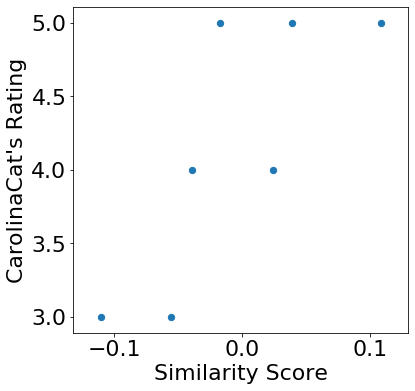

In [384]:
import matplotlib
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(6,6))

plt.scatter(x=val['sim_score'],y=val['rating'],s=40)
plt.xlabel('Similarity Score')
plt.ylabel("CarolinaCat's Rating")
matplotlib.rcParams.update({'font.size': 22, 'font.weight': 'regular'})


In [373]:
negatives = [157, 244]
positives = [224, 120]